### Contexto 

A fintech de Crédito XX iniciou sua operação de concessão de empréstimo pessoal e acompanhou a performance de pagamento de clientes após 1 ano. Ela pede para verificar quais os fatores de risco dos clientes de forma a conseguir aprovar mais contratos com a menor inadimplência possível.
Com base nessas informações:

Quais fatores de risco estão mais associados a inadimplência? Com isso, o que a fintech deveria mudar de forma a minimizar a inadimplência?
Crie uma forma de atribuir a probabilidade de inadimplência para cada cliente da base usando os fatores de risco identificados.
Discuta um corte nessa probabilidade de forma a aprovar clientes apenas acima do corte. Se isso acontecer, qual a probabilidade de inadimplência esperada e qual a proporção de clientes aprovados esperada?

### Estrutura da analise 


    Analise exploratoria
        - 
        -
        -
    
    Analise IV
    
    Analise regressao logistica com modelo estatistico
    
    Analise preditiva por machinie learning
    
    

### Carregamento de pacotes 

In [1]:
import pandas as pd
import numpy as np


# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz
from plotnine import*
import matplotlib.pyplot as plt

# Pacotes de modelagem
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import recall_score


from sklearn.model_selection import train_test_split

# Módulo de Análise Exploratória
import aed
from ydata_profiling import ProfileReport


from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_iris  # Exemplo com o dataset Iris
import graphviz
import pydotplus
from IPython.display import Image



import imblearn


import statsmodels.api as sm

import preditiva


C:\Users\tania\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
C:\Users\tania\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.


### Ajuste do banco de dados

In [2]:
#Leitura de dados
df = pd.read_excel("Base_Inadimplencia.xlsx", sheet_name=1)

In [24]:
#df.columns
#df.dtypes
#df.isnull().sum()
#df.index.duplicated().sum()
df.info()
#print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Idade                 1000 non-null   int64 
 1   Sexo                  1000 non-null   object
 2   Escolaridade          1000 non-null   object
 3   Tipo_Moradia          1000 non-null   object
 4   Saldo_Investimento    1000 non-null   object
 5   Saldo_Conta_Corrente  1000 non-null   object
 6   Valor_Emprestimo      1000 non-null   int64 
 7   Duracao_Emprestimo    1000 non-null   int64 
 8   Inadimplencia         1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [12]:
#df['Inadimplencia'] = df['Inadimplencia'].astype('category')

##### Grafico de contagem inadimplencia 

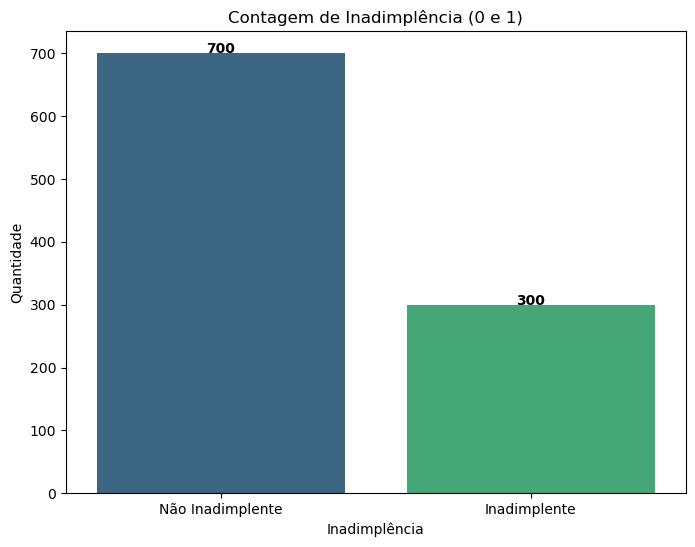

In [41]:
contagem = df['Inadimplencia'].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=contagem.index, y=contagem.values, palette="viridis")

# Adicionar contagens nas barras
for i, v in enumerate(contagem.values):
    ax.text(i, v + 0.1, str(v), ha='center', fontweight='bold')

# Adicionar rótulos e título
plt.xlabel("Inadimplência")
plt.ylabel("Quantidade")
plt.title("Contagem de Inadimplência (0 e 1)")
plt.xticks([0, 1], ["Não Inadimplente", "Inadimplente"])

# Exibir o gráfico
plt.show()

Apesar da base de inadimplência nao possuir uma descrepancia nas categorias, posuindo uma proporção 70% não inadimplente e 30% inadimplentes. Ainda sim devemos usar alguma metodologia para base de dados desbalanceadas.

### Analise exploratoria

###### ANALISE EXPLORATÓRIA RESUMO:

A partir do relatório gerado observamos inicialmente uma alta correlação das variáveis "duração do empréstimo" e "valor do empréstimo". trazendo a informação que, para adiante, quando formos fazer a análise de regressão logística optemos por uma ou por outra variável para não ocasionar multicolinearidade.

Logo após podemos ver um valor de information value (IV) significativo entre as categorias da variável "saldo em conta corrente" sendo a mais significativa: 'sem conta' seguido de 'pouco'. A variável 'saldo investimento' também possui nível de IV significativo. Isso que dizer que os grupos dessa variável não são homogêneos em relação a variável inadimplência, ou seja, existe alguma relaçao das categorias com a inadimplencia.

Foi gerado tambem os graficos box-plot das variaveis continuas para identificação de out-liers. Constando que naõ temos muitos valores descrepantes.

#### Relatorio Profile Report

In [3]:
Relatorio = ProfileReport(df, title="Relatório Inadimplência")
Relatorio

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

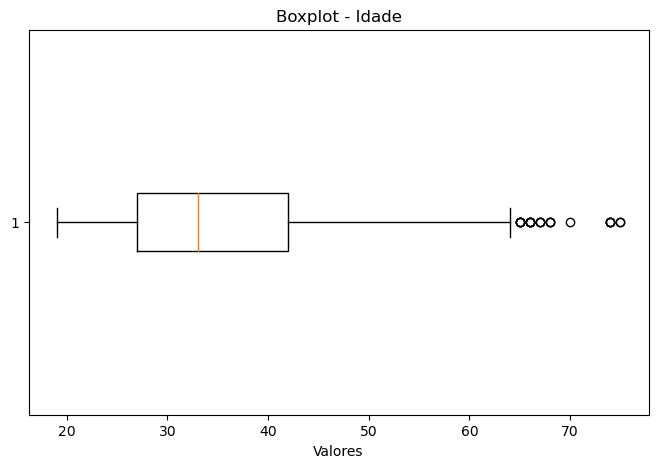

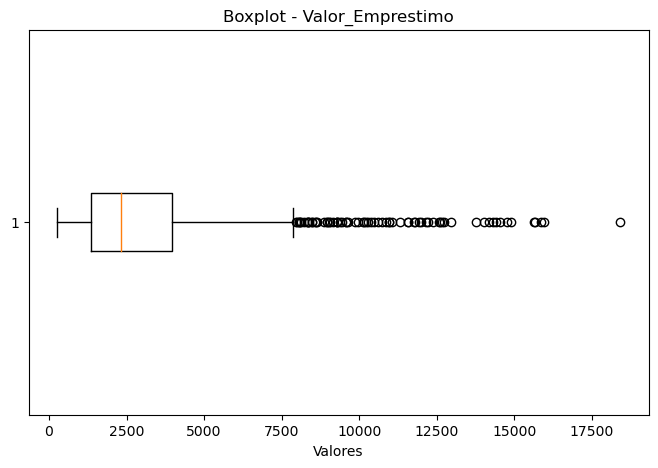

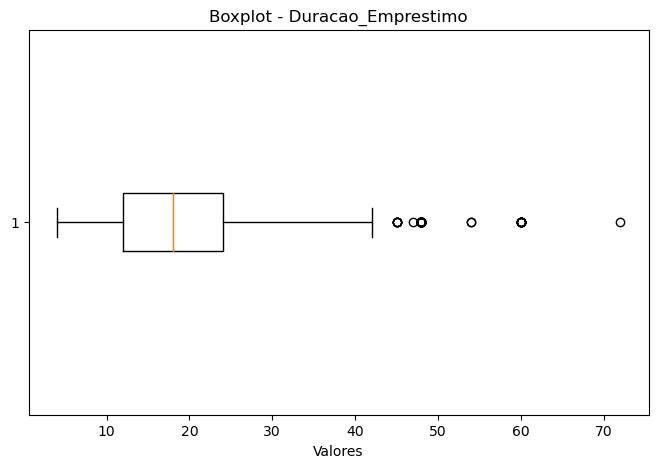

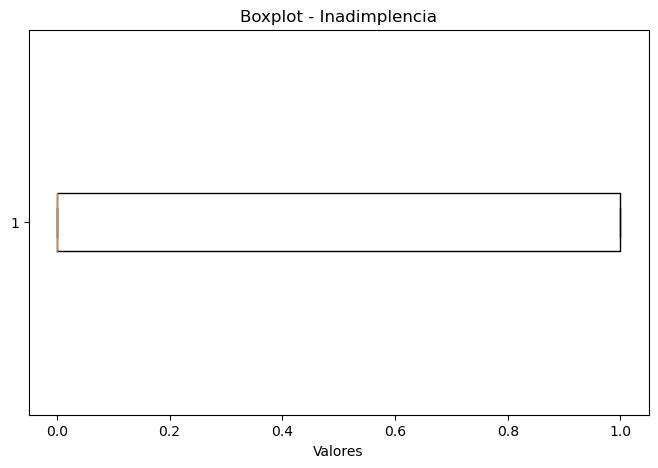

In [6]:
import matplotlib
matplotlib.use('Agg') 
%matplotlib inline
# Percorre todas as colunas do DataFrame
for coluna in df.columns:
    # Verifica se a coluna contém valores inteiros
    if pd.api.types.is_integer_dtype(df[coluna]):
        plt.figure(figsize=(8, 5))
        plt.boxplot(df[coluna].dropna(), vert=False)
        plt.title(f'Boxplot - {coluna}')
        plt.xlabel('Valores')
        plt.show()

C:\Users\tania\AppData\Local\Temp\ipykernel_7728\2802771126.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


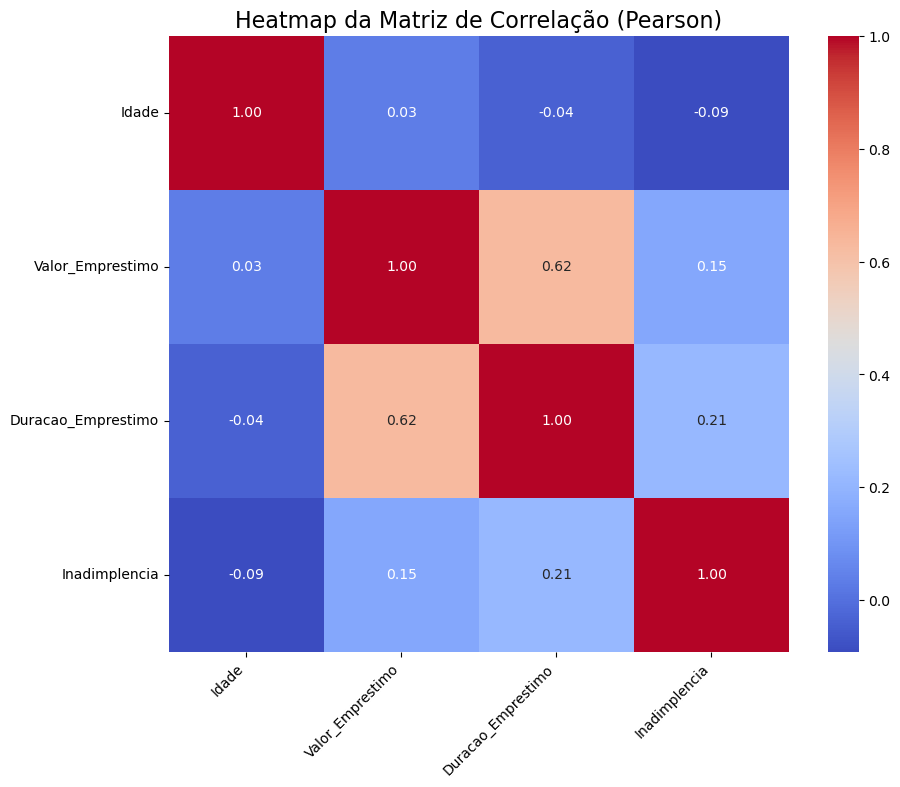

In [7]:
correlation_matrix = df.corr(method="pearson")
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração do tamanho do gráfico
plt.figure(figsize=(10, 8))

# Criando o heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Ajustes e título
plt.title("Heatmap da Matriz de Correlação (Pearson)", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

#### Analise bivariada Information value (IV)

Atenção: A analise IV não funciona com a variavel de referencia categorica. Tem que ser inteira.

In [19]:
df_iv = aed.analise_iv(df,'Inadimplencia')
df_iv.get_lista_iv()

C:\Users\tania\Desktop\Git-Hub\Financial_Technology\Financial_Technology\aed.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Inadimplencia,IV
Variavel,
Saldo_Conta_Corrente,0.73
Duracao_Emprestimo,0.25
Saldo_Investimento,0.20
Valor_Emprestimo,0.11
Idade,0.09
Tipo_Moradia,0.09
Sexo,0.03
Escolaridade,0.01


In [20]:
df_iv.get_bivariada(var_escolhida='Saldo_Conta_Corrente')

==> "Saldo_Conta_Corrente" tem IV de 0.73


Inadimplencia,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Saldo_Conta_Corrente,Alto,21,87,108,10.8,7.00,12.43,19.44,0.56,-0.58,0.03
1,Saldo_Conta_Corrente,Moderado,98,126,224,22.4,32.67,18.00,43.75,1.82,0.60,0.09
2,Saldo_Conta_Corrente,Pouco,135,139,274,27.4,45.00,19.86,49.27,2.27,0.82,0.21
3,Saldo_Conta_Corrente,Sem conta,46,348,394,39.4,15.33,49.71,11.68,0.31,-1.17,0.40


In [22]:
df_iv.get_bivariada(var_escolhida='Saldo_Investimento')

==> "Saldo_Investimento" tem IV de 0.2


Inadimplencia,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Saldo_Investimento,Alto,17,94,111,11.1,5.67,13.43,15.32,0.42,-0.87,0.07
1,Saldo_Investimento,Moderado,34,69,103,10.3,11.33,9.86,33.01,1.15,0.14,0.00
2,Saldo_Investimento,Pouco,217,386,603,60.3,72.33,55.14,35.99,1.31,0.27,0.05
3,Saldo_Investimento,Sem investimento,32,151,183,18.3,10.67,21.57,17.49,0.49,-0.71,0.08


#### Box plot Inadimplencia VS valor_Emprestimo / Duracao_Emprestimo 

<Axes: xlabel='Inadimplencia', ylabel='Valor_Emprestimo'>

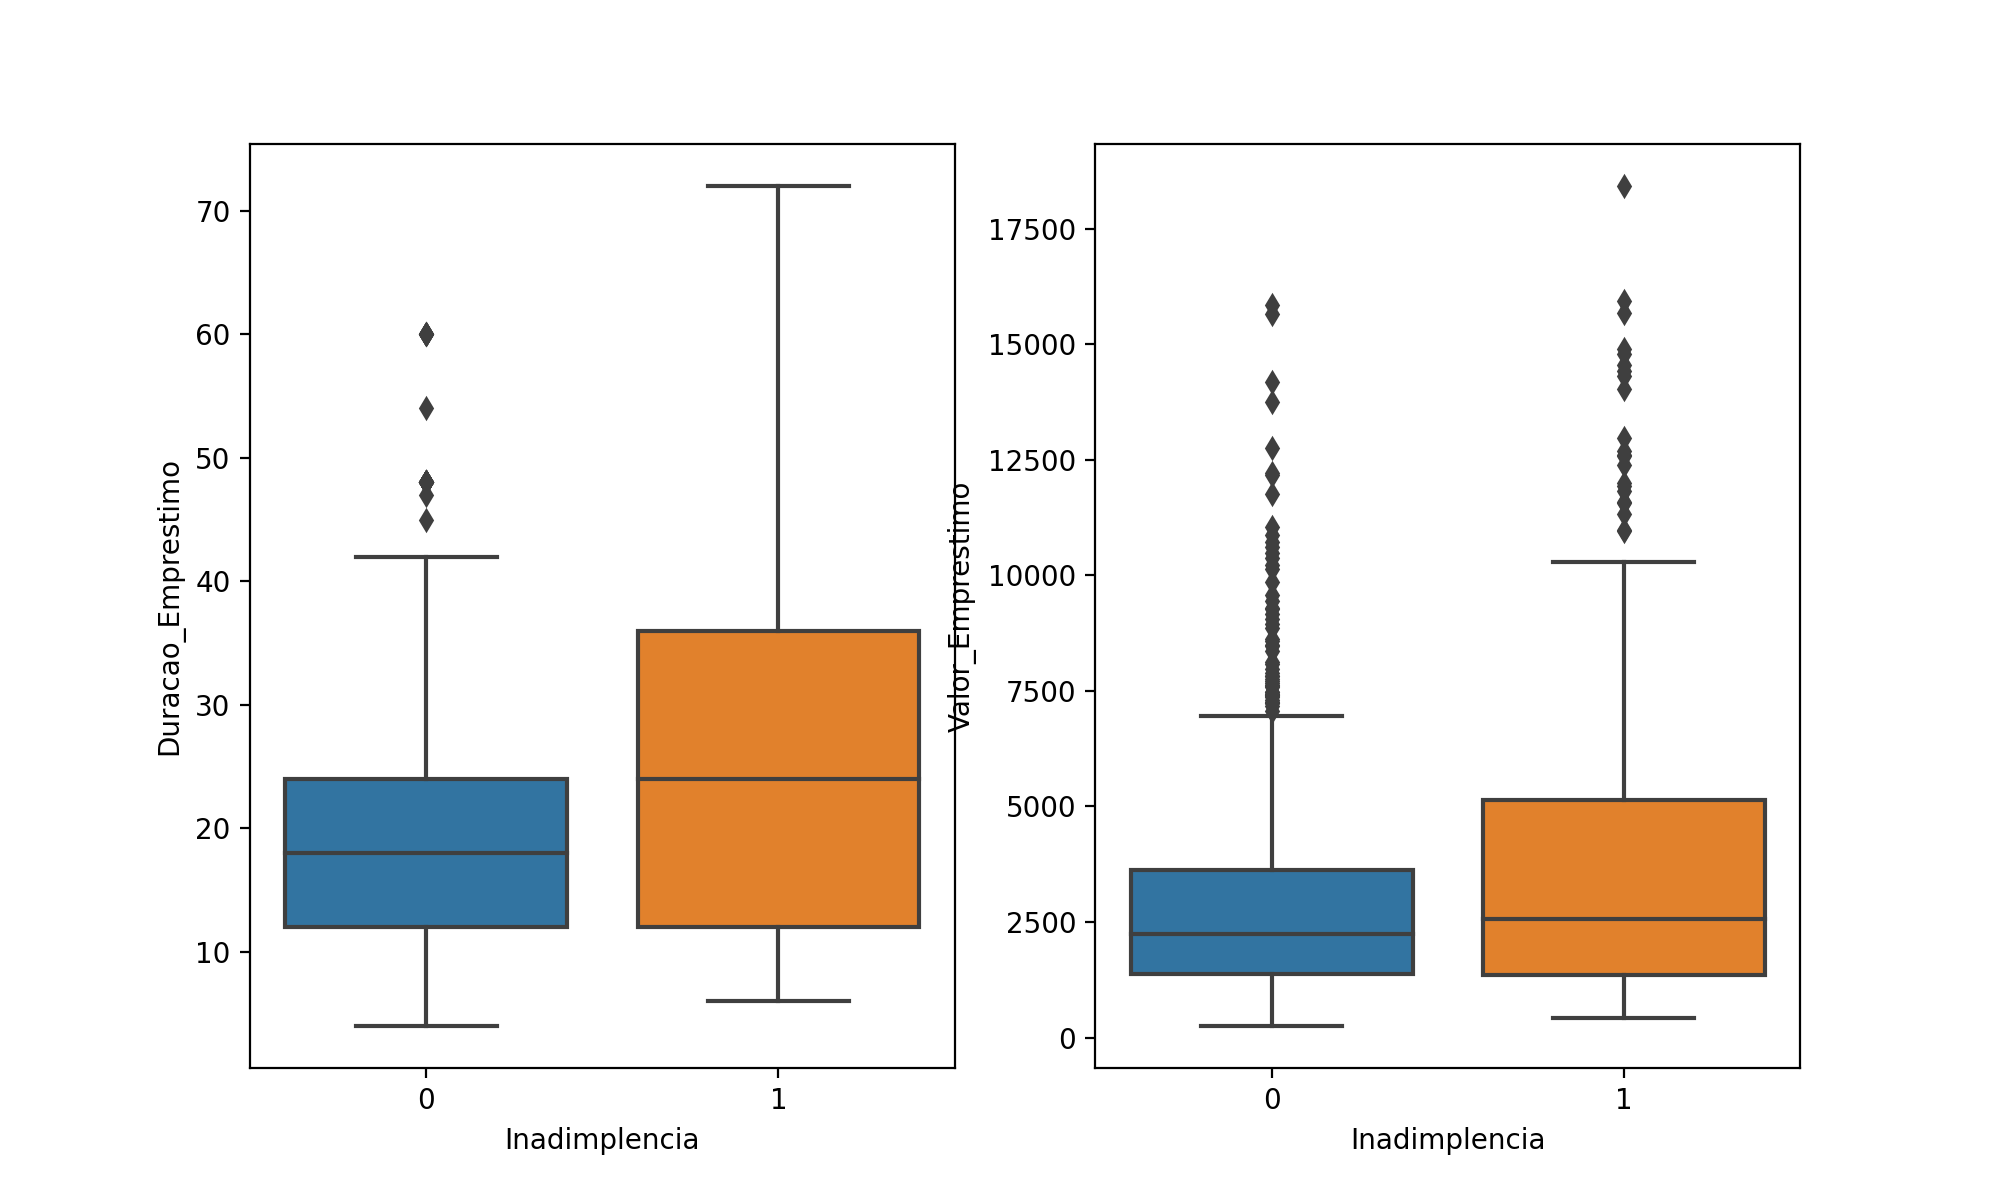

In [40]:

plt.figure(figsize=(10, 6))  # Define o tamanho da figura

plt.subplot(1, 2, 1)  # Cria o primeiro subplot para a variável 
sns.boxplot(x='Inadimplencia', y='Duracao_Emprestimo', data=df)

plt.subplot(1, 2, 2)  # Cria o segundo subplot para a variável 
sns.boxplot(x='Inadimplencia', y='Valor_Emprestimo', data=df)


### Criação do modelo de Arvore de decisão

##### INTERPRETAÇÃO DO MODELO DE ARVORE DE DECISÃO:

As características da pessoa inadimplente segundo a arvore de decisão gerada é: 
pessoas que possuem valor em conta corrente que não é 'alto' e que a duração do empréstimo é maior que 22.5 meses.  



Da arvore de decisão gerada obtemos uma acurácia de 0.75 significando um bom ajuste no modelo. (ter cuidado para ver se a base de dados é balanceada. (no caso está)) (a acurácia em arvores de decisão não são precisas com a base desbalanceada? ou seria somente em casos de modelo de regressão logístico?) (que tipo de análise seria feito para bases desbalanceadas) 

In [3]:

# Removendo colunas específicas do dataframe
df_modelo_a = df.drop(['Inadimplencia', 'Valor_Emprestimo', 'Sexo', 'Escolaridade','Tipo_Moradia','Idade'], axis=1)

# Aplicando a codificação one-hot ao dataframe
df_modelo_a = pd.get_dummies(df_modelo_a)

# Exibindo as primeiras linhas do dataframe modificado
df_modelo_a.head()

,Duracao_Emprestimo,Saldo_Investimento_Alto,Saldo_Investimento_Moderado,Saldo_Investimento_Pouco,Saldo_Investimento_Sem investimento,Saldo_Conta_Corrente_Alto,Saldo_Conta_Corrente_Moderado,Saldo_Conta_Corrente_Pouco,Saldo_Conta_Corrente_Sem conta
0,6,0,0,0,1,0,0,1,0
1,48,0,0,1,0,0,1,0,0
2,12,0,0,1,0,0,0,0,1
3,42,0,0,1,0,0,0,1,0
4,24,0,0,1,0,0,0,1,0


In [4]:
# Target (variável resposta)
y = df['Inadimplencia']

# Features (variáveis explicativas)
x = df_modelo_a

##### Separação de base e treino

In [44]:
train_ratio = 0.70
valid_ratio = 0.15
test_ratio = 0.15

# Passo 1) Particionamos a base em Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=test_ratio,
                                                    random_state=50)

In [45]:
print(type(x_train))
print(type(y_train))
print(x_train.shape)  # Verifica as dimensões de x_train
print(y_train.shape)  # Verifica as dimensões de y_train
print(y_train.value_counts())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(850, 9)
(850,)
0    599
1    251
Name: Inadimplencia, dtype: int64


#### Tecnica de oversampling (para base desbalanceada)

In [46]:
# IMPORTANTE: a reamostragem deve ser feita APENAS na base de Treino
rnd_over = imblearn.over_sampling.RandomOverSampler(sampling_strategy=0.5, random_state=42)
x_train_over, y_train_over = rnd_over.fit_resample(x_train, y_train)

print('Shape do y_train: ', y_train.shape)
print('Shape do y_train_over: ', y_train_over.shape)

Shape do y_train:  (850,)
Shape do y_train_over:  (898,)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(850, 9)
(850,)
0    599
1    251
Name: Inadimplencia, dtype: int64


##### Separação do treino em  treino e validação

In [47]:
# Passo 2) Particionamos a base de Treino anterior em 85% para Treino e 15% para Teste
x_train_over, x_valid, y_train_over, y_valid = train_test_split(x_train_over, y_train_over, 
                                                    train_size=train_ratio/(1-test_ratio),
                                                    random_state=50)

##### Treino da arvore de decisão com a base de validação

Foi selecionada os parametros das arvore levando em consideração Recall é uma boa metrica para a inadimplencia pois ele mede: de todos que FORAM inadimplente, quanto que o modelo falou que seria. ou seja, quanto o modelo esta protejendo a instituição de nao emprestar dinheiro a aqueles que vem a ser inadimplentes

In [49]:
def treina_arvore(max_depth):
    modelo = DecisionTreeClassifier(max_depth=max_depth)
    modelo.fit(x_train_over, y_train_over)
    
    
    
   # Previsão de probabilidades para cálculo da AUC
    prob_train = modelo.predict_proba(x_train_over)[:,1]
    prob_valid = modelo.predict_proba(x_valid)[:,1]
    
    # Previsão de classes para cálculo do recall
    pred_train = modelo.predict(x_train_over)
    pred_valid = modelo.predict(x_valid)
    
   # Cálculo da AUC e Recall
    return pd.DataFrame({
        "max_depth": max_depth, 
        "AUC em Treino": roc_auc_score(y_train_over, prob_train),
        "AUC em Valid": roc_auc_score(y_valid, prob_valid),
        "Recall em Treino": recall_score(y_train_over, pred_train),
        "Recall em Valid": recall_score(y_valid, pred_valid)
    }, index=[0])

# Loop para treinar e armazenar os resultados de diferentes profundidades
arvores = pd.DataFrame()

for max_depth in range(2, 10):
    arvores = pd.concat([arvores, treina_arvore(max_depth)], axis=0)

arvores = arvores.reset_index(drop=True)
arvores

,max_depth,AUC em Treino,AUC em Valid,Recall em Treino,Recall em Valid
0,2,0.714725,0.698644,0.258333,0.186441
1,3,0.756338,0.752373,0.250000,0.186441
2,4,0.786986,0.753136,0.250000,0.186441
3,5,0.821923,0.713305,0.554167,0.355932
4,6,0.840974,0.706949,0.508333,0.322034
5,7,0.858396,0.700763,0.595833,0.406780
6,8,0.876240,0.730339,0.645833,0.559322
7,9,0.882745,0.719068,0.641667,0.559322


In [50]:
# vamos escolher o modelo de parâmetro max_depth = 9   
modelo_final = DecisionTreeClassifier(max_depth=9)
modelo_final.fit(x_train_over, y_train_over)

DecisionTreeClassifier(max_depth=9)

In [51]:
# Medidas de desempenho modelo classificação 
preditiva.calcula_desempenho(modelo_final,
                             x_train_over, y_train_over,
                             x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.801083,0.606667,-0.24
AUROC,0.882745,0.603455,-0.32
KS,0.591859,0.288543,-0.51
Precision,0.716279,0.375000,-0.48
Recall,0.641667,0.306122,-0.52
F1,0.676923,0.337079,-0.50


In [52]:
# Gera os dados DOT da árvore
dot_data = export_graphviz(modelo_final, 
                           out_file=None, 
                           feature_names=list(x.columns),  
                           class_names=['Não Inadimplencia', 'Inadimplencia'],  
                           filled=True, rounded=True,  
                           special_characters=True)  

# Converte o gráfico DOT para uma imagem PNG
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("arvore_inadimplencia.png")

# Exibe a imagem dentro do Jupyter Notebook
plt.figure(figsize=(20, 15))
plt.imshow(plt.imread("arvore_inadimplencia.png"))
plt.axis('off')
plt.title("Perfil de inadimplentes Utilizando Árvores de Decisão")
plt.show()


InvocationException: GraphViz's executables not found

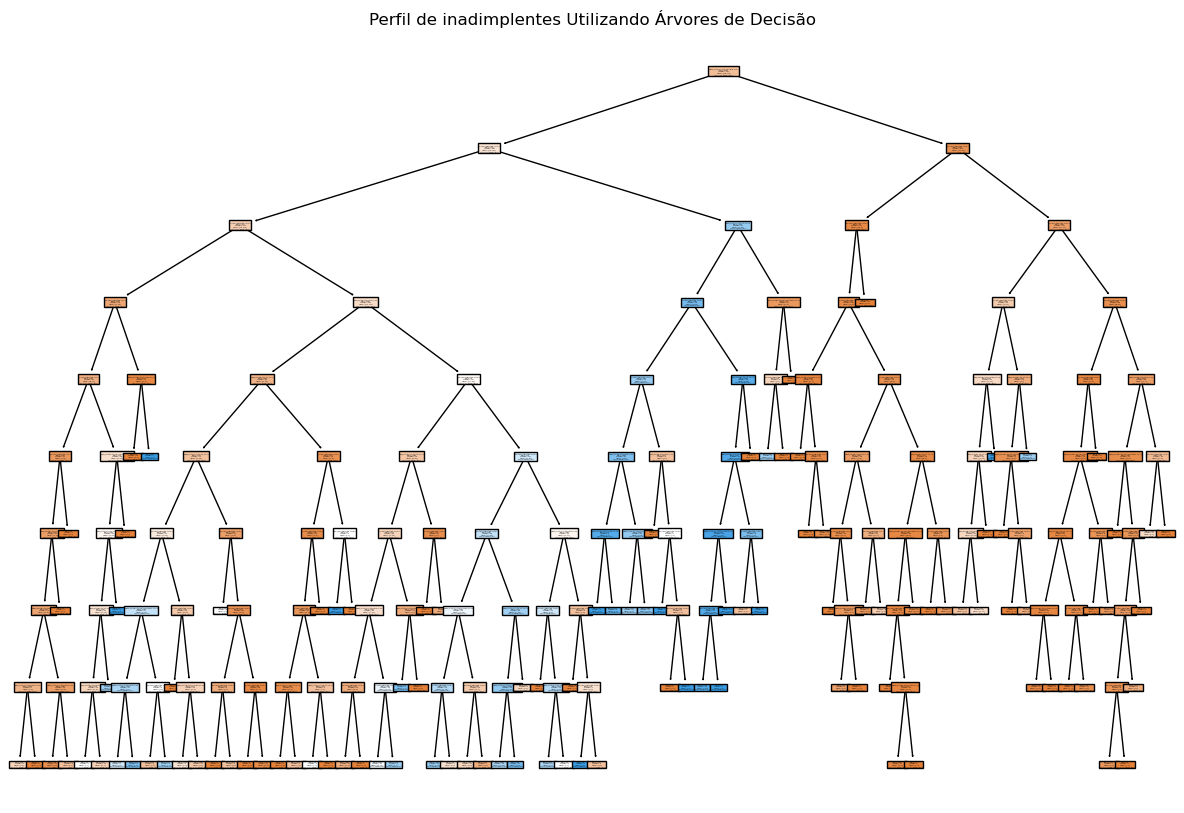

In [53]:

sns.reset_defaults()
%matplotlib inline
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(modelo_final,
               feature_names=features, 
               class_names=['Não Inadimplencia','Inadimplencia'],
               filled=True);
plt.title("Perfil de inadimplentes Utilizando Árvores de Decisão");

NameError: name 'Recall' is not defined

##  Regressão Logistica para atribuição do score 

##### INTERPRETAÇÃO DA REGRESSÃO LOGISTICA:
A partir do modelo logístico de regressão gerada pelo 'statsmodels' apodemos observar que as variáveis mais relacionadas com a inadimplência são: 

idade, reduzindo a cada ano 2% a chance de ser inadimplente.
duração empréstimo, aumentando, a cada mês, em 3% a chance de ser inadimplente.
sexo 'mulher', diminuindo em 32% a chance de ser inadimplente.
escolaridade 'graduação', diminui em 29% a chance de ser inadimplente.
tipo de moradia 'própria', diminui em 32% a chance de ser inadimplente
saldo em conta corrente 'moderado', aumenta em 62% a chance  de ser inadimplente
saldo em conta corrente 'pouco', aumenta em 122% a chance de ser inadimplente
saldo em conta corrente 'sem conta corrente', diminui em 65% a chance de ser inadimplente


O pseudo r2 do modelo feito pelo 'statsmodels' deu uma valor de 0,16. significa que o modelo explica uma parcela relativamente pequena da variabilidade dos dados.  (mas isso não implica automaticamente em uma má capacidade de previsão.)

Já para a o modelo logístico para classificação realizado com o 'sklearn' possuiu uma performance melhor, com uma precisão de 0,57 e um recall de 0,35. em seguido foi criada uma variável chamada 'probabilidade inadimplência' para cada cliente e anexada ao no banco de dados.

##### NOTA: 
Com que insights criar um corte na probabilidade? e como calcular a inadimplência esperada e a quantidade de clientes aprovados?

In [5]:
#Separeando variaveis resposta e criando variaveis dummies 


y= df['Inadimplencia']

df2 = df.drop(columns=['Inadimplencia'])

#Para analise de regressao logistica é necessario excluir a primeira classe de dummies
df_modelo_l = pd.get_dummies(df2, drop_first=True) 
df_modelo_l

,Idade,Valor_Emprestimo,Duracao_Emprestimo,Sexo_M,Escolaridade_Graduacao,Escolaridade_Pos Graduacao,Tipo_Moradia_De favor,Tipo_Moradia_Propria,Saldo_Investimento_Moderado,Saldo_Investimento_Pouco,Saldo_Investimento_Sem investimento,Saldo_Conta_Corrente_Moderado,Saldo_Conta_Corrente_Pouco,Saldo_Conta_Corrente_Sem conta
0,67,1169,6,1,1,0,0,1,0,0,1,0,1,0
1,22,5951,48,0,1,0,0,1,0,1,0,1,0,0
2,49,2096,12,1,0,1,0,1,0,1,0,0,0,1
3,45,7882,42,1,1,0,1,0,0,1,0,0,1,0
4,53,4870,24,1,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1736,12,0,0,1,0,1,0,1,0,0,0,1
996,40,3857,30,1,0,0,0,1,0,1,0,0,1,0
997,38,804,12,1,1,0,0,1,0,1,0,0,0,1
998,23,1845,45,1,1,0,1,0,0,1,0,0,1,0


#### NOTA:
Note que na saída do 'resultado.summary' não temos uma categoria de cada variável por conta do drop_first. como faço para analisar essa categoria?  

## Modelo estatistico com statsmodel

In [6]:
#Criando o modelo de regressão logística usando statsmodels para analise dos coeficientes 
import statsmodels.api as sm

modelo_l = sm.Logit(y, df_modelo_l)
resultado = modelo_l.fit()

# Imprimir a saída detalhada
print(resultado.summary())



Optimization terminated successfully.
         Current function value: 0.511423
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Inadimplencia   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      986
Method:                           MLE   Df Model:                           13
Date:                Thu, 05 Dec 2024   Pseudo R-squ.:                  0.1628
Time:                        18:05:06   Log-Likelihood:                -511.42
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 2.319e-35
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Idade                                  -0.0250      0.007 

In [52]:
print("Idade:", 1- np.exp(-0.0248))
print("Duracao_Emprestmo:", np.exp(0.0302))
print("Sexo_M:", 1-np.exp(-0.4037)) 
print("Escolaridade_Graduacao:", 1- np.exp(-0.3178))
print("Tipo_Moradia_Propria:", 1- np.exp(-0.4476))
print("Saldo_Conta_Corrente_Moderado:", np.exp(0.4644))
print("Saldo_Conta_Corrente_Pouco:", np.exp(0.7883))
print("Saldo_Conta_Corrente_Sem conta:", 1- np.exp(-1.0744))

Idade: 0.02449500648176295
Duracao_Emprestmo: 1.0340674437262785
Sexo_M: 0.32800205735241106
Escolaridade_Graduacao: 0.2957345963166266
Tipo_Moradia_Propria: 0.36383670789275624
Saldo_Conta_Corrente_Moderado: 1.6290548499725743
Saldo_Conta_Corrente_Pouco: 2.2242060044526317
Saldo_Conta_Corrente_Sem conta: 0.6527811478489736


In [8]:
probabilidades_previstas = resultado.predict(df_modelo_l)

# As probabilidades_previstas agora contêm as probabilidades previstas para cada indivíduo
print(probabilidades_previstas)

0      0.097285
1      0.726226
2      0.057080
3      0.660508
4      0.462866
         ...   
995    0.123578
996    0.542541
997    0.070759
998    0.762111
999    0.550461
Length: 1000, dtype: float64


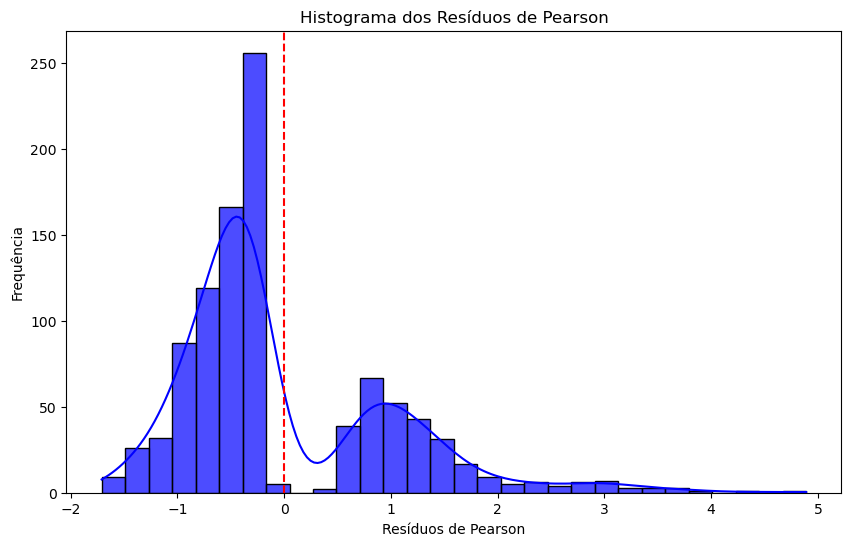

In [59]:
# Resíduos de Pearson
residuos = resultado.resid_pearson

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, bins=30, color='blue', alpha=0.7)
plt.title("Histograma dos Resíduos de Pearson")
plt.xlabel("Resíduos de Pearson")
plt.ylabel("Frequência")
plt.axvline(x=0, color='r', linestyle='--')
plt.show()

#### Probabilidade dos colaboradores se tornarem inadimplente (SCORE) 

In [9]:
#Apartir do modelo de regressao logistico statsmodel
dados_teste_com_prob = df.copy()
dados_teste_com_prob['Probabilidades_previstas'] = probabilidades_previstas 

# Formatando as probabilidades para saírem com no máximo 5 casas decimais
dados_teste_com_prob['Probabilidades_previstas'] = dados_teste_com_prob['Probabilidades_previstas'].apply(lambda x: format(x, '.5f'))
dados_teste_com_prob['Probabilidades_previstas'] = dados_teste_com_prob['Probabilidades_previstas'].astype(float)


In [10]:
# Filtrar o DataFrame para as observações que atendem aos critérios
observacoes_filtradas = dados_teste_com_prob[(dados_teste_com_prob['Inadimplencia'] == 1) & (dados_teste_com_prob['Probabilidades_previstas'] < 0.4)]

# Contar o número de observações no DataFrame filtrado
numero_observacoes = len(observacoes_filtradas)

# Imprimir o número de observações que atendem aos critérios
print("Número de observações com Inadimplência = 1 e Probabilidade_prevista < 0.4:", numero_observacoes)

Número de observações com Inadimplência = 1 e Probabilidade_prevista < 0.4: 123


#### Salvando os scores em um novo banco de dados 

In [14]:
# Ordenando o DataFrame pelas probabilidades de Prob_Inadimplencia em ordem decrescente
df_inad = dados_teste_com_prob.sort_values(by='Probabilidades_previstas', ascending=False)

#df_inad.to_csv("dados_teste_com_prob.csv")


In [18]:
# Filtrar os registros com Inadimplência igual a 0
inadimplentes_0 = df_inad[df_inad['Inadimplencia'] == 0]

# Ordenar em ordem decrescente pela coluna 'Probabilidade_de_Inadimplencia'
inadimplentes_0_ordenados = inadimplentes_0.sort_values(by='Probabilidades_previstas', ascending=False)

# Selecionar os 20% principais registros
top_20_percent = inadimplentes_0_ordenados.head(int(len(inadimplentes_0_ordenados) * 0.25))

# Calcular a maior probabilidade
maior_probabilidade = top_20_percent['Probabilidades_previstas'].max()

# Calcular a probabilidade que separa os 20%
limite_20_percent = top_20_percent['Probabilidades_previstas'].iloc[-1]

# Imprimir os resultados
print(f"Maior probabilidade de inadimplência nos 25%: {maior_probabilidade:.5f}")
print(f"Probabilidade que separa os 25%: {limite_20_percent:.5f}")

Maior probabilidade de inadimplência nos 25%: 0.74493
Probabilidade que separa os 25%: 0.37743


Dentre os nossos clientes, o que mais possui chance de ser inadimplente, possui uma probabilidade de 74%. 

Dos que ainda nao estao inadimplentes, 75% possuem menos de 37%de chance de se tornarem inadimplentes.

Dos 25% da base possui mais de 37% de chance de se tornar inadimplente.

## Modelo por sklearn

In [80]:
# Dividindo o conjunto de dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Escalando os dados numéricos
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Criar e treinar o modelo de regressão logística com o solver 'liblinear'
modelo = LogisticRegression(solver='liblinear', random_state=42)
modelo.fit(x_train_scaled, y_train)

# Realizar previsões no conjunto de teste
y_pred = modelo.predict(x_test_scaled)
y_prob = modelo.predict_proba(x_test_scaled)

# Exibindo as previsões
print("Classes previstas:", y_pred)
print("Probabilidades previstas:", y_prob)

Classes previstas: [0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 1 0]
Probabilidades previstas: [[0.52844598 0.47155402]
 [0.54076686 0.45923314]
 [0.487186   0.512814  ]
 [0.82896013 0.17103987]
 [0.79422991 0.20577009]
 [0.47482367 0.52517633]
 [0.85729137 0.14270863]
 [0.64308911 0.35691089]
 [0.90541775 0.09458225]
 [0.91609131 0.08390869]
 [0.69072152 0.30927848]
 [0.32193731 0.67806269]
 [0.92398293 0.07601707]
 [0.19957139 0.80042

#### Fazendo previsão para uma nova observação

In [82]:

nova_observacao = pd.DataFrame({
    'Idade': [30],
    'Sexo': ['Masculino'],
    'Escolaridade': ['Superior'],
    'Tipo_Moradia': ['Alugada'],
    'Saldo_Investimento': ['Baixo'],
    'Saldo_Conta_Corrente': ['Médio'],
    'Valor_Emprestimo': [50000],
    'Duracao_Emprestimo': [24]
})

# Convertendo a nova observação para o mesmo formato do conjunto de treinamento
nova_observacao_dummies = pd.get_dummies(nova_observacao, drop_first=True)

# Garantindo que a nova observação tenha as mesmas colunas que o conjunto de treino
nova_observacao_dummies = nova_observacao_dummies.reindex(columns=x.columns, fill_value=0)

# Escalando a nova observação
nova_observacao_scaled = scaler.transform(nova_observacao_dummies)

# Realizando a previsão para a nova observação
classe_prevista = modelo.predict(nova_observacao_scaled)
probabilidades = modelo.predict_proba(nova_observacao_scaled)

print(f"Classe prevista: {classe_prevista[0]}")
print(f"Probabilidades das classes: {probabilidades}")


Classe prevista: 0
Probabilidades das classes: [[0.71927862 0.28072138]]


In [65]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1], d

#### Medidas de performance do modelo

In [62]:
#Metricas para o modelo de regressão logística com o solver 'liblinear'
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score, average_precision_score

#Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

# Calcular a precisão do modelo
precision = precision_score(y_test, y_pred)
print("Precisão do modelo:", precision)

# Calcular o recall (sensibilidade) do modelo
recall = recall_score(y_test, y_pred)
print("Recall do modelo:", recall)

# Calcular o F1-score do modelo
f1 = f1_score(y_test, y_pred)
print("F1-score do modelo:", f1)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")

print(conf_matrix)

auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)

# Calcular o AUC-PR
auc_pr = average_precision_score(y_test, y_pred)
print("AUC-PR:", auc_pr)


Acurácia do modelo: 0.7233333333333334
Precisão do modelo: 0.5769230769230769
Recall do modelo: 0.32967032967032966
F1-score do modelo: 0.4195804195804196
Matriz de confusão:
[[187  22]
 [ 61  30]]
AUC-ROC: 0.6122035858877963
AUC-PR: 0.39352775429698506


In [ ]:
# Removendo os outliers do dataset de treino
#df_train.drop(df_train[(df_train.Product_Category_1 == 19) | (df_train.Product_Category_1 == 20)].index,inplace=True)

### CONCLUSÃO

###### O que a empresa deve fazer a partir da análise feita?

Temos 590 pessoas que ainda não estao inadimplentes porém que possuem mais de 20% de chance de inadimplencia.

Realizar um acompanhamento de perto dos clientes que já possuem empréstimo com conta corrente pouca e média com parcelas maiores de 22 meses. e ofertar empréstimo com foco em clientes mulheres, que possuam escolaridade graduação e que possuem uma conta corrente alta.  


#### NOTA:

Pensei em, através da regressão logística, atribuir uma probabilidade entre 0 e 1 para cada pessoa na base de dados. traçar um corte na probabilidade 0.4 onde acima disso seria considerado inadimplente. assim teríamos uma inadimplência esperada com as pessoas que foram inadimplentes abaixo de 0.4? 

Ao realizar essa etapa verificamos que 123 observações que não eram consideradas pelo modelo como possível inadimplente, foram inadimplentes o que significa que não foi uma boa analise?

#### NOTA2: 

##### PARA FUTURAS ANALISES USAR NA ARVORE DE DECISÃO: 
viz = dtreeviz(tree_model=modelo_Inadimplencia,
               x_data=x, y_data=y, 
               target_name='Target',
               feature_names=features,
               class_names=['Não Inadimplencia', 'Inadimplencia'], 
               scale=2.0)
viz

# Rascunho codigo 

In [ ]:
df = pd.read_excel("Base_Inadimplencia.xlsx", sheet_name=1)



# Removendo colunas específicas do dataframe
df_modelo_a = df.drop(['Inadimplencia', 'Valor_Emprestimo', 'Sexo', 'Escolaridade'], axis=1)

# Aplicando a codificação one-hot ao dataframe
df_modelo_a = pd.get_dummies(df_modelo_a)

# Exibindo as primeiras linhas do dataframe modificado
df_modelo_a.head()




# Target (variável resposta)
y = df['Inadimplencia']

# Features (variáveis explicativas)
x = df_modelo_a



train_ratio = 0.70
valid_ratio = 0.15
test_ratio = 0.15

# Passo 1) Particionamos a base em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=test_ratio,
                                                    random_state=50)

# Passo 2) Particionamos a base de Treino anterior em 85% para Treino e 15% para Teste
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                    train_size=train_ratio/(1-test_ratio),
                                                    random_state=50)





############################################################

  
def treina_arvore(max_depth):
    # Definição e treinamento do modelo
    modelo = DecisionTreeClassifier(max_depth=max_depth)
    modelo.fit(X_train, y_train)
    
    # Previsão de probabilidades para cálculo da AUC
    prob_train = modelo.predict_proba(X_train)[:,1]
    prob_valid = modelo.predict_proba(X_valid)[:,1]
    
    # Previsão de classes para cálculo do recall
    pred_train = modelo.predict(X_train)
    pred_valid = modelo.predict(X_valid)
    
    # Cálculo da AUC e Recall
    return pd.DataFrame({
        "max_depth": max_depth, 
        "AUC em Treino": roc_auc_score(y_train, prob_train),
        "AUC em Valid": roc_auc_score(y_valid, prob_valid),
        "Recall em Treino": recall_score(y_train, pred_train),
        "Recall em Valid": recall_score(y_valid, pred_valid)
    }, index=[0])

# Loop para treinar e armazenar os resultados de diferentes profundidades
arvores = pd.DataFrame()

for max_depth in range(2, 10):
    arvores = pd.concat([arvores, treina_arvore(max_depth)], axis=0)

arvores = arvores.reset_index(drop=True)
arvores
########################################################################################################################






